In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo


# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
x = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df = pd.concat([x, y], axis=1)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
Missing values in cleaned data:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
Number of duplicate rows: 0


In [ ]:
x_clean = df_clean.drop('num', axis=1)
y_clean = df_clean['num']
y_clean_binary = y_clean.apply(lambda x: 1 if x > 0 else 0)
print("Cleaned data shape (X):", x_clean.shape)
print("Target shape (y):", y_clean_binary.shape)
print("Sample rows after cleaning:")
print(x_clean.head())

Cleaned data shape (X): (297, 13)
Target shape (y): (297,)
Sample rows after cleaning:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_clean)
x_scaled_df = pd.DataFrame(x_scaled, columns=x_clean.columns)
print(x_scaled_df.head())

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.936181  0.691095 -2.240629  0.750380 -0.276443  2.430427  1.010199   
1  1.378929  0.691095  0.873880  1.596266  0.744555 -0.411450  1.010199   
2  1.378929  0.691095  0.873880 -0.659431 -0.353500 -0.411450  1.010199   
3 -1.941680  0.691095 -0.164289 -0.095506  0.051047 -0.411450 -1.003419   
4 -1.498933 -1.446980 -1.202459 -0.095506 -0.835103 -0.411450  1.010199   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.017494 -0.696419  1.068965  2.264145 -0.721976  0.655877  
1 -1.816334  1.435916  0.381773  0.643781  2.478425 -0.894220  
2 -0.899420  1.435916  1.326662  0.643781  1.411625  1.172577  
3  1.633010 -0.696419  2.099753  2.264145 -0.721976 -0.894220  
4  0.978071 -0.696419  0.295874 -0.976583 -0.721976 -0.894220  


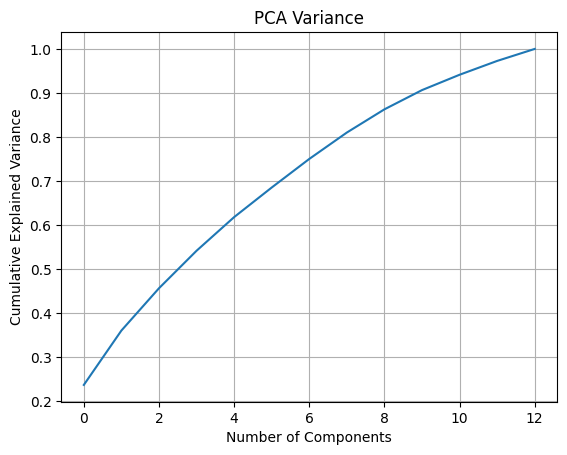

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
x_pca = pca.fit_transform(x_scaled_df)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Variance")
plt.grid()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
x_pca_final = pca.fit_transform(x_scaled_df)
pca_df = pd.DataFrame(x_pca_final, columns=[f'PC{i+1}' for i in range(7)])
print(pca_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  1.130664 -1.087655  3.164263  2.293052  0.023175  0.578814  0.664854
1  3.190926 -1.417885 -0.533715 -0.857970 -0.006289  0.745347 -0.259063
2  3.124339  0.657008 -0.285134 -0.626641  0.152793  1.130179 -0.324995
3 -0.484339  1.410972  0.397806  2.832741  0.721309 -0.388361 -0.522221
4 -2.284542 -0.330033 -0.072260  1.209318  0.770835  0.625587  0.379567


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    pca_df,
    y_clean_binary,
    test_size=0.2,
    random_state=42
    )
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9166666666666666

Confusion Matrix:
[[33  3]
 [ 2 22]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        36
           1       0.88      0.92      0.90        24

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(" Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred))
print("\n Classification Report:")
print(classification_report(y_test, dt_pred))


 Decision Tree Accuracy: 0.8166666666666667

 Confusion Matrix:
[[30  6]
 [ 5 19]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        36
           1       0.76      0.79      0.78        24

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(" Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("\n Classification Report:")
print(classification_report(y_test, rf_pred))


 Random Forest Accuracy: 0.85

 Confusion Matrix:
[[32  4]
 [ 5 19]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        36
           1       0.83      0.79      0.81        24

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60



 SVM Accuracy: 0.8666666666666667

 Confusion Matrix:
[[33  3]
 [ 5 19]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        36
           1       0.86      0.79      0.83        24

    accuracy                           0.87        60
   macro avg       0.87      0.85      0.86        60
weighted avg       0.87      0.87      0.87        60



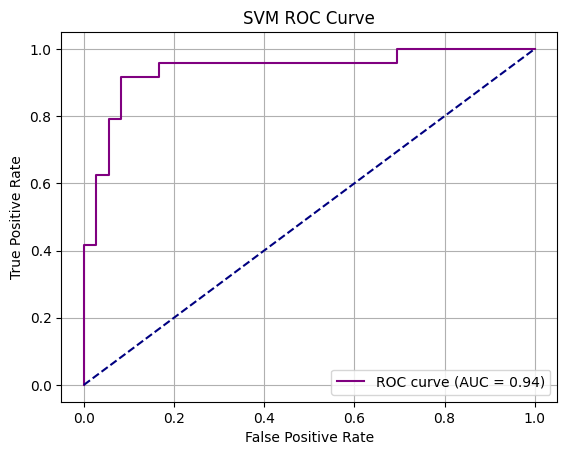

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(" SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))
print("\n Classification Report:")
print(classification_report(y_test, svm_pred))
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

svm_probs = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, svm_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='purple', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

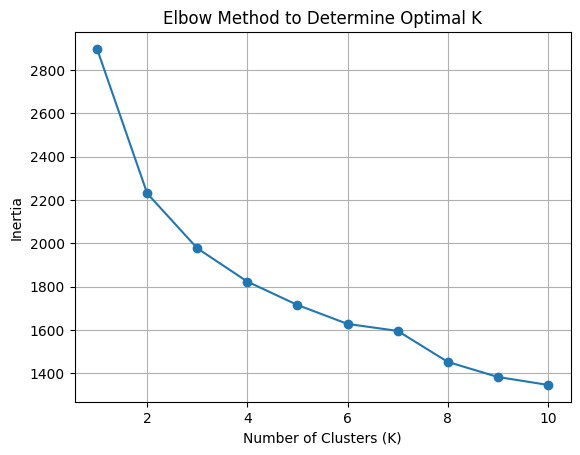

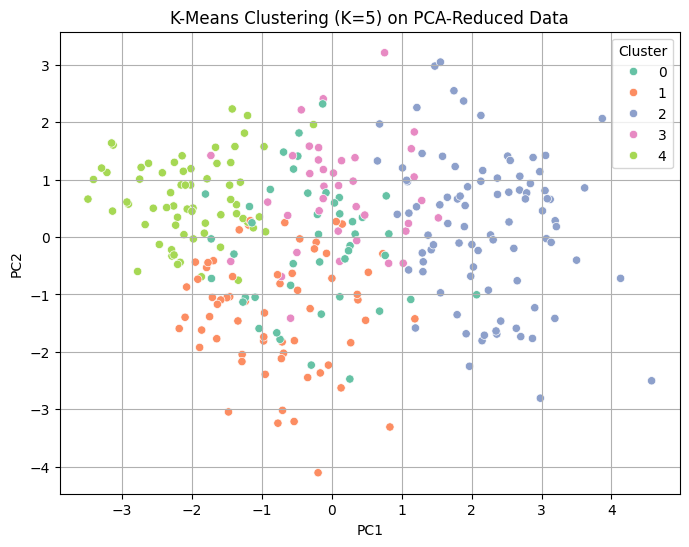

TrueLabel   0   1
Cluster          
0          26  18
1          54   9
2           6  81
3          15  23
4          59   6


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia_values.append(kmeans.inertia_)
    plt.figure()
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.grid()
plt.show()
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_df)
import seaborn as sns


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=kmeans_labels, palette='Set2')
plt.title('K-Means Clustering (K=5) on PCA-Reduced Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid()
plt.show()
pca_df['Cluster'] = kmeans_labels
pca_df['TrueLabel'] = y_clean_binary.values
cluster_comparison = pca_df.groupby('Cluster')['TrueLabel'].value_counts().unstack()
print(cluster_comparison)


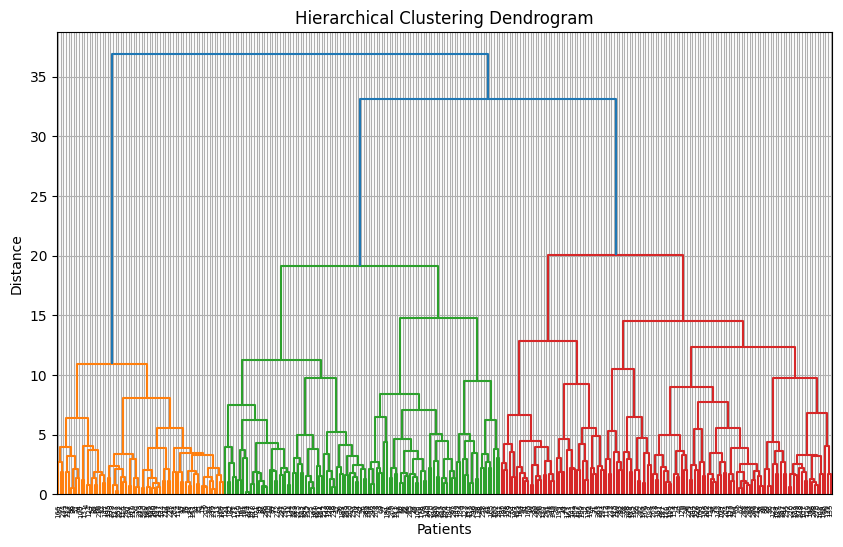

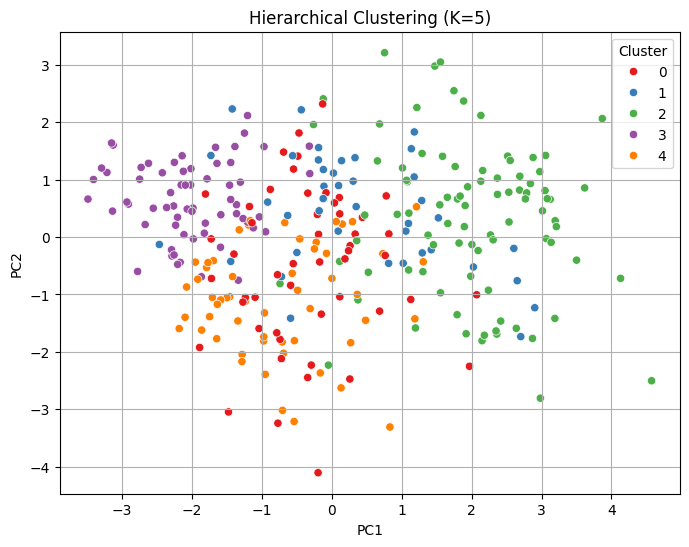

TrueLabel    0   1
HC_Cluster        
0           31  20
1           17  23
2            9  78
3           56   8
4           47   8


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(pca_df, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Distance')
plt.grid()
plt.show()
hc_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hc_labels = hc_model.fit_predict(pca_df)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=hc_labels, palette='Set1')
plt.title('Hierarchical Clustering (K=5)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid()
plt.show()
pca_df['HC_Cluster'] = hc_labels

hc_comparison = pca_df.groupby('HC_Cluster')['TrueLabel'].value_counts().unstack()
print(hc_comparison)

In [21]:
!pip install ucimlrepo
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
x = heart_disease.data.features
y = heart_disease.data.targets

# Define x_clean and y_clean_binary
df = pd.concat([x, y], axis=1)
df_clean = df.dropna()
x_clean = df_clean.drop('num', axis=1)
y_clean = df_clean['num']
y_clean_binary = y_clean.apply(lambda x: 1 if x > 0 else 0)

# Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_clean)
x_scaled_df = pd.DataFrame(x_scaled, columns=x_clean.columns)

# Apply PCA
pca = PCA(n_components=7)
x_pca = pca.fit_transform(x_scaled_df)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    x_pca, y_clean_binary, test_size=0.2, random_state=42
)

# Define and fit GridSearchCV
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Accuracy (Training CV):", grid_search.best_score_)
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
joblib.dump(best_rf, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
✅ Best Parameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100}
✅ Best Accuracy (Training CV): 0.8058510638297871
✅ Test Accuracy: 0.8833333333333333
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



['scaler.pkl']

In [23]:
import joblib
import pandas as pd

# Load the Scaler, PCA, and the trained model
scaler_loaded = joblib.load('scaler.pkl')
pca_loaded = joblib.load('pca.pkl')
model_loaded = joblib.load('heart_disease_model.pkl')

# Prepare new data for prediction
# IMPORTANT: Replace this sample data with your actual new data for prediction
# This is a placeholder using the first row of your cleaned data for demonstration
x_new = x_clean.iloc[[0]]


# 1. Scale the new data
x_new_scaled = scaler_loaded.transform(x_new)

# 2. Apply PCA to the scaled new data
x_new_pca = pca_loaded.transform(x_new_scaled)

# 3. Make a prediction
prediction = model_loaded.predict(x_new_pca)

print("Prediction for the new data:", prediction)

Prediction for the new data: [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [24]:
import pandas as pd
import joblib

# 1. Load saved tools
scaler = joblib.load('scaler.pkl')
pca = joblib.load('pca.pkl')
model = joblib.load('heart_disease_model.pkl')

# 2. New samples (manual input)
x_new = [
    [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1],  # Sample 1
    [45, 0, 2, 130, 234, 0, 1, 165, 0, 1.5, 1, 0, 2]   # Sample 2
]

# 3. Convert to DataFrame with original feature names
feature_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol',
    'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal'
]
x_new_df = pd.DataFrame(x_new, columns=feature_names)

# 4. Apply scaling and PCA
x_scaled = scaler.transform(x_new_df)
x_pca = pca.transform(x_scaled)

# 5. Make predictions
predictions = model.predict(x_pca)

# 6. Display results
for i, pred in enumerate(predictions):
    label = "✅ Healthy" if pred == 0 else "⚠️ Disease Detected"
    print(f"Sample {i+1} Prediction: {label}")


Sample 1 Prediction: ✅ Healthy
Sample 2 Prediction: ✅ Healthy


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [29]:
!streamlit run heart_disease_app.py
!pip install streamlit
!pip install pyngrok


/bin/bash: line 1: streamlit: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.3 MB/s eta 0:00:00


In [30]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load saved model, scaler, and PCA
model = joblib.load('heart_disease_model.pkl')
scaler = joblib.load('scaler.pkl')
pca = joblib.load('pca.pkl')

st.set_page_config(page_title="Heart Disease Prediction", layout="centered")
st.title("💓 Heart Disease Risk Predictor")

st.markdown("### Enter the patient's health data:")

age = st.number_input("Age", min_value=1, max_value=120, value=50)
sex = st.selectbox("Sex", [0, 1])
cp = st.selectbox("Chest Pain Type (cp)", [0, 1, 2, 3])
trestbps = st.number_input("Resting Blood Pressure (trestbps)", value=120)
chol = st.number_input("Cholesterol (chol)", value=200)
fbs = st.selectbox("Fasting Blood Sugar > 120? (fbs)", [0, 1])
restecg = st.selectbox("Resting ECG (restecg)", [0, 1, 2])
thalach = st.number_input("Max Heart Rate (thalach)", value=150)
exang = st.selectbox("Exercise Induced Angina (exang)", [0, 1])
oldpeak = st.number_input("ST Depression (oldpeak)", value=1.0)
slope = st.selectbox("Slope of ST (slope)", [0, 1, 2])
ca = st.selectbox("Number of major vessels (ca)", [0, 1, 2, 3])
thal = st.selectbox("Thalassemia (thal)", [1, 2, 3])

input_data = pd.DataFrame([[
    age, sex, cp, trestbps, chol, fbs, restecg, thalach,
    exang, oldpeak, slope, ca, thal
]], columns=[
    'age', 'sex', 'cp', 'trestbps', 'chol',
    'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal'
])

if st.button("🔍 Predict"):
    x_scaled = scaler.transform(input_data)
    x_pca = pca.transform(x_scaled)
    prediction = model.predict(x_pca)[0]

    if prediction == 1:
        st.error("⚠️ High Risk: The patient may have heart disease.")
    else:
        st.success("✅ Low Risk: The patient is likely healthy.")


Writing app.py


In [35]:
!ngrok config add-authtoken 30s8SOuyOUBLFTHwPioAxXcAjWs_DteQVmAB3VPoB8XMKZtA


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [37]:
!ngrok config add-authtoken 30s8SOuyOUBLFTHwPioAxXcAjWs_DteQVmAB3VPoB8XMKZtA


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [38]:
import os
import threading
import time
from pyngrok import ngrok

# Start the streamlit app in a separate thread
def run_app():
    os.system('streamlit run app.py')

thread = threading.Thread(target=run_app)
thread.start()

# Wait for streamlit to launch
time.sleep(5)

# Connect ngrok tunnel
public_url = ngrok.connect(8501)
print(f"🔗 Public URL: {public_url}")


🔗 Public URL: NgrokTunnel: "https://02ee9383e490.ngrok-free.app" -> "http://localhost:8501"
